In [21]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARMA
from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('train_(2).csv',parse_dates=['Month'],index_col='Month')
df.head(15)

,Avg_sunspot_count
Month,
1749-01-01,97
1749-02-01,104
1749-03-01,117
1749-04-01,93
1749-05-01,142
1749-06-01,139
1749-07-01,158
1749-08-01,111
1749-09-01,127


In [4]:
df.shape

(3144, 1)

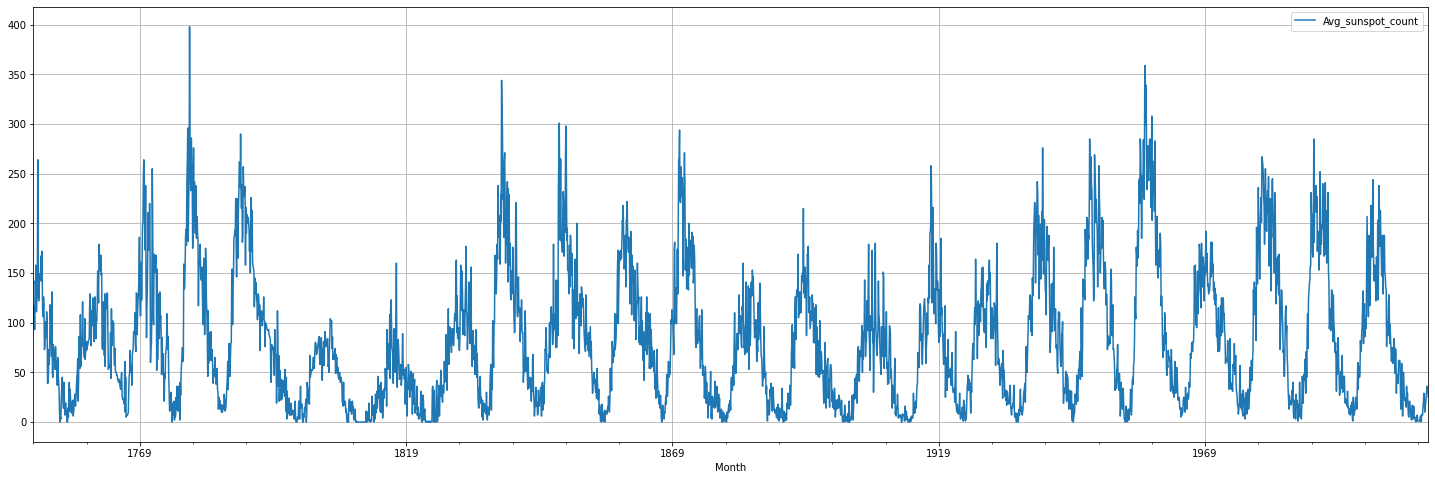

In [5]:
rcParams['figure.figsize'] = 25,8
df.plot(grid=True);

In [6]:
df.isnull().sum()

Avg_sunspot_count    0
dtype: int64

In [7]:
df_decompose = seasonal_decompose(df, model = 'additive')

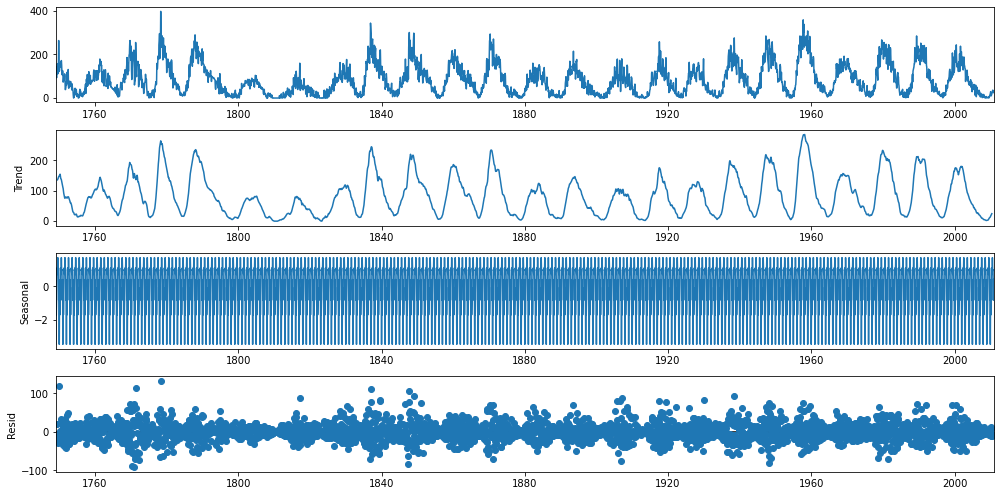

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
df_decompose.plot()
plt.show()

In [9]:
observations= df.values
test_result = adfuller(observations)

In [10]:
df_diff = df.diff(periods=1).dropna()
observations= df_diff.values
test_result = adfuller(observations)
test_result

(-8.957057915600274,
 8.4185121277957e-15,
 28,
 3114,
 {'1%': -3.432451701569058,
  '5%': -2.8624686010902822,
  '10%': -2.5672643166522913},
 28875.37539646089)

In [11]:
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -8.957058
p-value: 0.000000
Critical Values:
	1%: -3.43245
	5%: -2.86247
	10%: -2.56726


p value is less that 0.05 so the series is stationary

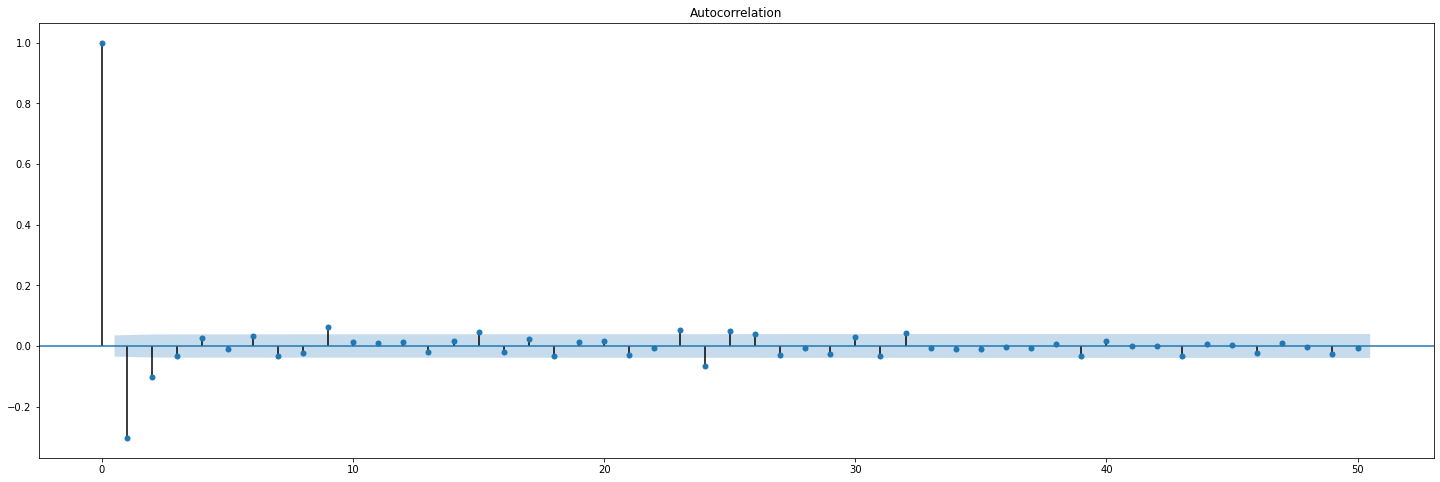

In [12]:
rcParams['figure.figsize'] = 25,8
plot_acf(df_diff,lags=50);

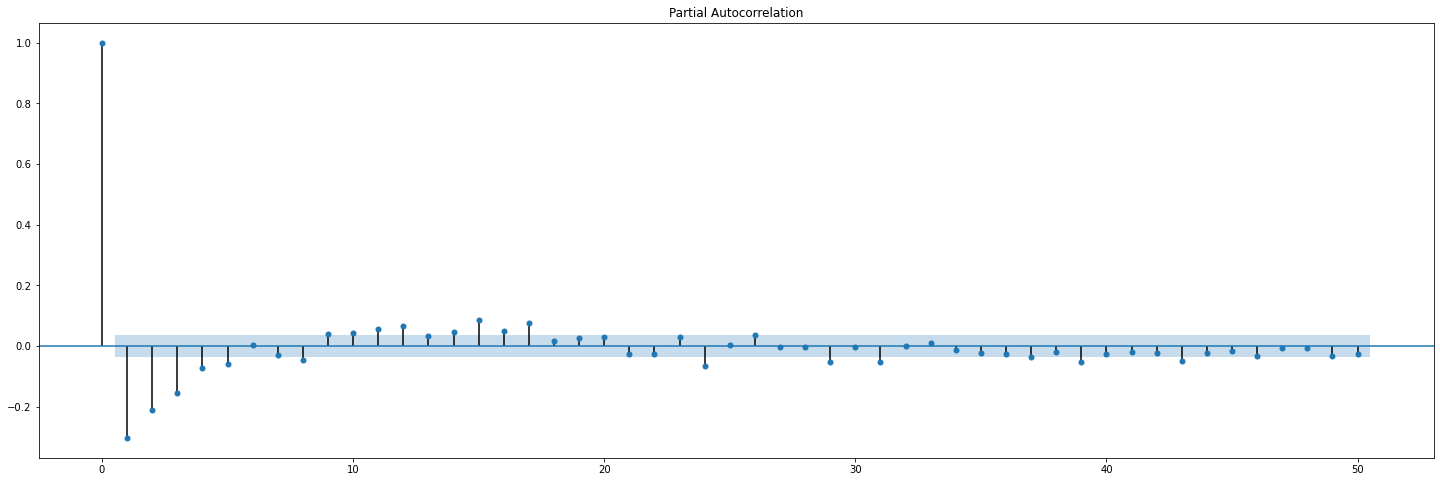

In [13]:
plot_pacf(df_diff,lags=50);

In [14]:
import itertools


In [15]:
p = q = range(4, 36)
d= range(0,2)
pdq = list(itertools.product(p, d, q))

In [16]:
dfObj1 = pd.DataFrame(columns=['param', 'AIC'])
dfObj1

,param,AIC


In [ ]:
for param in pdq:
            try:
                mod = ARIMA(df, order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj1 = dfObj1.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(4, 0, 4) - AIC:29116.092870945395
ARIMA(4, 0, 5) - AIC:29119.742229652984
ARIMA(4, 0, 6) - AIC:29105.903353812784
ARIMA(4, 0, 7) - AIC:29106.36036366636
ARIMA(4, 0, 8) - AIC:29108.3549616074
ARIMA(4, 0, 9) - AIC:29108.173050920275
ARIMA(4, 0, 10) - AIC:29109.929307564285
ARIMA(4, 0, 11) - AIC:29103.716807599463
ARIMA(4, 0, 12) - AIC:29100.77527999605
ARIMA(4, 1, 4) - AIC:29194.855866893806
ARIMA(4, 1, 5) - AIC:29189.640593191267
ARIMA(4, 1, 6) - AIC:29190.707573835083
ARIMA(4, 1, 7) - AIC:29084.48071456253
ARIMA(4, 1, 8) - AIC:29194.94193181394
ARIMA(4, 1, 9) - AIC:29190.947422161393
ARIMA(4, 1, 10) - AIC:29189.353420966152
ARIMA(4, 1, 11) - AIC:29190.095949279414
ARIMA(4, 1, 12) - AIC:29191.490570073038
ARIMA(4, 1, 13) - AIC:29193.435206422175
ARIMA(4, 1, 14) - AIC:29080.50639212825
ARIMA(4, 1, 15) - AIC:29205.26722674397
ARIMA(4, 1, 16) - AIC:29196.60689209913
ARIMA(4, 1, 17) - AIC:29199.24865509165
ARIMA(4, 1, 18) - AIC:29197.88751608342
ARIMA(4, 1, 19) - AIC:29184.53858704574

ARIMA(27, 1, 10) - AIC:29064.4677969978
ARIMA(27, 1, 11) - AIC:29066.4562051049
ARIMA(27, 1, 12) - AIC:29063.043852097908
ARIMA(27, 1, 13) - AIC:29065.04979149226
ARIMA(28, 0, 4) - AIC:29092.587537734355
ARIMA(28, 0, 5) - AIC:29092.755736634797
ARIMA(28, 0, 6) - AIC:29093.684826252414
ARIMA(28, 0, 7) - AIC:29094.307772225715
ARIMA(28, 0, 8) - AIC:29092.06820471728
ARIMA(28, 1, 4) - AIC:29089.53804385371
ARIMA(28, 1, 5) - AIC:29088.24279492291
ARIMA(28, 1, 6) - AIC:29067.369610241287
ARIMA(28, 1, 8) - AIC:29091.77071028125
ARIMA(28, 1, 9) - AIC:29064.49381851619
ARIMA(28, 1, 10) - AIC:29071.17186821816
ARIMA(28, 1, 11) - AIC:29072.234137945234
ARIMA(28, 1, 12) - AIC:29060.45598414135
ARIMA(28, 1, 13) - AIC:29072.54635049691
ARIMA(29, 0, 4) - AIC:29089.156522310353
ARIMA(29, 0, 5) - AIC:29091.375279852182
ARIMA(29, 0, 9) - AIC:29067.04975467919
ARIMA(29, 1, 4) - AIC:29091.418472821817
ARIMA(29, 1, 5) - AIC:29078.42223292365
ARIMA(29, 1, 6) - AIC:29089.28514150688
ARIMA(29, 1, 7) - AIC:29

In [ ]:
dfObj1.sort_values(by=['AIC'])

In [19]:
model = ARIMA(df, order=(9, 1, 7))

results_Arima = model.fit()

print(results_Arima.summary())

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [ ]:
ARIMA_predictions=results_Arima.predict(start=pred_start, end=pred_end)

In [ ]:
ARIMA_predictions

In [ ]:
df_actual = pd.read_csv('Sunspots.csv',parse_dates=['Date'],index_col='Date')

In [ ]:
df_actual.tail(15)

In [ ]:
df_actual.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
test_actual=df_actual[df_actual.index.year >=2011]

In [ ]:
test_actual.shape

In [ ]:
test_actual.tail(5)

In [ ]:
test_actual.drop(test_actual.tail(1).index,
        inplace = True)

In [ ]:
ARMA_pred=pd.DataFrame(predictions,columns=train.columns)

In [ ]:
ARIMA_prd = pd.DataFrame(ARIMA_predictions,columns=train.columns)

In [ ]:
ARIMA_prd.tail(5)

In [ ]:
date = pd.date_range(start='01/01/2011', end='12/31/2020', freq='M')

In [ ]:
date.shape

In [85]:
ARMA_pred['Month']=date

In [118]:
ARIMA_prd['Month']=date

In [86]:
ARMA_pred=ARMA_pred.set_index('Month')

In [87]:
ARMA_pred.tail(5)

,Avg_sunspot_count
Month,
2020-08-31,67.971615
2020-09-30,68.344531
2020-10-31,68.728449
2020-11-30,69.135108
2020-12-31,69.590218


In [119]:
ARIMA_prd=ARIMA_prd.set_index('Month')

In [120]:
ARIMA_prd

,Avg_sunspot_count
Month,
2011-01-31,33.712191
2011-02-28,39.849770
2011-03-31,42.738352
2011-04-30,45.015061
2011-05-31,49.830920
...,...
2020-08-31,67.971615
2020-09-30,68.344531
2020-10-31,68.728449


In [88]:
test_actual['Predicted_sunspots']= ARMA_pred['Avg_sunspot_count']

In [89]:
test_actual.tail(5)

,Monthly Mean Total Sunspot Number,Predicted_sunspots
Date,,
2020-08-31,7.5,67.971615
2020-09-30,0.6,68.344531
2020-10-31,14.4,68.728449
2020-11-30,34.0,69.135108
2020-12-31,21.8,69.590218


In [121]:
test_actual['ARIMA_Predicted_sunspots']=ARIMA_prd['Avg_sunspot_count']

In [92]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test_actual['Monthly Mean Total Sunspot Number'],test_actual['Predicted_sunspots'], squared=False)
print(rmse)

49.49889911378173


In [142]:
rmse_ARIMA = mean_squared_error(test_actual['Monthly Mean Total Sunspot Number'],test_actual['ARIMA_Predicted_sunspots'], squared=False)
print(rmse_ARIMA)

49.49889911378173


In [124]:
ARIMA_prd.to_csv('/Users/swatiraman/Downloads/SwatiRaman_Hackathon1.csv')

In [26]:
import itertools
p = q = range(9, 13)
d= range(0,2)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (9, 0, 10)(9, 0, 10, 12)
Model: (9, 0, 10)(9, 0, 11, 12)
Model: (9, 0, 11)(9, 0, 12, 12)
Model: (9, 0, 11)(9, 1, 9, 12)


In [27]:
pdq

[(9, 0, 9),
 (9, 0, 10),
 (9, 0, 11),
 (9, 0, 12),
 (9, 1, 9),
 (9, 1, 10),
 (9, 1, 11),
 (9, 1, 12),
 (10, 0, 9),
 (10, 0, 10),
 (10, 0, 11),
 (10, 0, 12),
 (10, 1, 9),
 (10, 1, 10),
 (10, 1, 11),
 (10, 1, 12),
 (11, 0, 9),
 (11, 0, 10),
 (11, 0, 11),
 (11, 0, 12),
 (11, 1, 9),
 (11, 1, 10),
 (11, 1, 11),
 (11, 1, 12),
 (12, 0, 9),
 (12, 0, 10),
 (12, 0, 11),
 (12, 0, 12),
 (12, 1, 9),
 (12, 1, 10),
 (12, 1, 11),
 (12, 1, 12)]

In [28]:
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

,param,seasonal,AIC


In [29]:
import statsmodels.api as sm
for param_seasonal in model_pdq:
    mod = SARIMAX(df,order=(9,1,13),
                      seasonal_order=param_seasonal,
                      enforce_stationarity=False,
                      enforce_invertibility=False)
            
    results_SARIMA = mod.fit()
    print('SARIMA{}x{}12 - AIC:{}'.format('(4,1,7)', param_seasonal, results_SARIMA.aic))
    dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

ValueError: Invalid model: moving average lag(s) {12} are in both the seasonal and non-seasonal moving average components.

In [131]:
dfObj2.sort_values(by=['AIC'])

,param,seasonal,AIC
149,"(0, 0, 0)","(6, 1, 7, 12)",28332.635326
165,"(0, 0, 0)","(7, 1, 7, 12)",28333.367359
101,"(0, 0, 0)","(3, 1, 7, 12)",28340.083435
85,"(0, 0, 0)","(2, 1, 7, 12)",28340.934429
117,"(0, 0, 0)","(4, 1, 7, 12)",28342.421313
...,...,...,...
3,"(0, 0, 0)","(0, 0, 3, 12)",33388.638881
8,"(0, 0, 0)","(0, 1, 0, 12)",33468.957231
2,"(0, 0, 0)","(0, 0, 2, 12)",34121.942376
1,"(0, 0, 0)","(0, 0, 1, 12)",35620.351735


In [23]:
model = SARIMAX(df,
                                order=(0,0,0),
                                seasonal_order=(12, 1, 9, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_Sarima = model.fit()
print(model_Sarima.summary())

KeyboardInterrupt: 

In [ ]:
SARIMA_predictions=model_Sarima.forecast(steps=120)

In [ ]:
SARIMA_predictions

In [ ]:
SARIMA_pred = pd.DataFrame(SARIMA_predictions,columns=train.columns)

In [ ]:
SARIMA_pred['Month']=date
SARIMA_pred=SARIMA_pred.set_index('Month')

In [ ]:
SARIMA_pred.tail()

In [ ]:
test_actual['SARIMA_Predicted_sunspots']= SARIMA_pred['Avg_sunspot_count']

In [ ]:
test_actual

In [ ]:
rmse_SARIMA = mean_squared_error(test_actual['Monthly Mean Total Sunspot Number'],test_actual['SARIMA_Predicted_sunspots'], squared=False)
print(rmse_SARIMA)

SARIMA_pred.to_csv('/Users/swatiraman/Downloads/SwatiRaman_Hackathon2.csv')

In [ ]:
-9o0l9p-097-l8uo
 